In [1]:
import requests
import pandas as pd
import urllib3

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

def get_project_data(project_id):
    API_URL = f"https://pad.crc.nd.edu/api/v2/projects/{project_id}/cards"
    try:
        # fetch_data_from_api
        r = requests.get(url=API_URL,verify=False)  # NOTE: Using verify=False due to a SSL issue, I need a valid certificate, then I will remove this parameter.
        r.raise_for_status() # Raise an exception if the status is not 200
        data = r.json()
        df = pd.json_normalize(data)
        return df
    except requests.exceptions.RequestException as e:
        print(e)
        print(f"Error accessing project data {project_id}: {r.status_code}")
        return None


In [2]:
project_id = 12
df = get_project_data(project_id)

In [3]:
df.columns.to_list()

['id',
 'sample_name',
 'test_name',
 'user_name',
 'date_of_creation',
 'raw_file_location',
 'processed_file_location',
 'processing_date',
 'camera_type_1',
 'notes',
 'sample_id',
 'quantity',
 'deleted',
 'project.id',
 'project.user_name',
 'project.project_name',
 'project.annotation',
 'project.test_name',
 'project.sample_names.sample_names',
 'project.neutral_filler',
 'project.qpc20',
 'project.qpc50',
 'project.qpc80',
 'project.qpc100',
 'project.notes',
 'issue.id',
 'issue.name',
 'issue.description',
 'issue']

In [4]:
## Counting unique values to identify categories in the 'sample_name' column

# Normalize case to lowercase and replace spaces with dashes in 'sample_name'
df['sample_name'] = df['sample_name'].str.lower().str.replace(' ', '-', regex=False)

# Counting unique values to identify categories
print(df['sample_name'].value_counts())

acetominophen                 499
ceftriaxone                   468
doxycycline                   432
ampicillin                    401
amoxicillin                   371
ciprofloxacin                 353
blank                         208
caco3-starch                  137
lactose                        83
swiped-but-not-run             78
ripe                           75
promethazine-hydrochloride     67
ethambutol                     67
rifampicin                     65
ferrous-sulfate                64
pyrazinamide                   63
albendazole                    61
chloroquine                    60
sulfamethoxazole               60
isoniazid                      60
azithromycin                   56
ampicillin-starch              53
doxycycline-starch             42
ciprofloxacin-starch           32
distractor                      6
                                5
Name: sample_name, dtype: int64


<Axes: xlabel='quantity', ylabel='Count'>

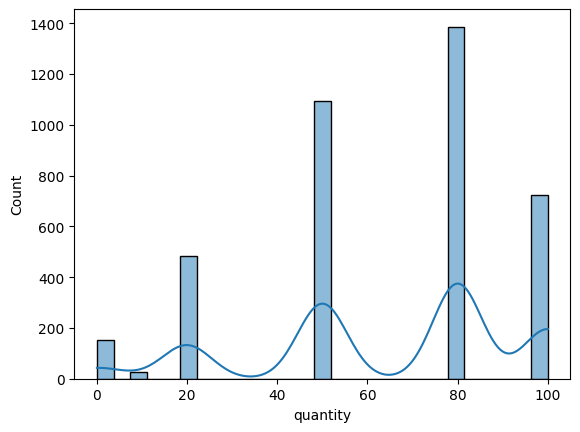

In [5]:
# Distribution visualization for 'quantity'
import seaborn as sns
sns.histplot(data=df, x='quantity', kde=True)

In [6]:
# List unique values for 'quantity'
unique_quantities = df['quantity'].unique()
print("Unique quantities:")
print(unique_quantities)



Unique quantities:
[ 80 100  50  20  10   0]


In [7]:
# Sample random 3 cases for each unique quantity
# If a group has less than 3 entries, it takes all from that group
sample_cases_per_quantity = df.groupby('quantity').apply(lambda x: x.sample(min(len(x), 3)))

print("\nRandom sample cases for unique quantities:")
sample_cases_per_quantity[['id', 'sample_name']]


Random sample cases for unique quantities:


id                 sample_name
quantity                                        
0        3744  46069                       blank
         3737  46062                       blank
         3750  46075                       blank
10       1795  44086  promethazine-hydrochloride
         1805  44099  promethazine-hydrochloride
         1798  44089  promethazine-hydrochloride
20       1902  44211  promethazine-hydrochloride
         3002  45327                  rifampicin
         701   42976          doxycycline-starch
50       1370  43651               ciprofloxacin
         1159  43434                 ceftriaxone
         3683  46008                 amoxicillin
80       421   42696                  ampicillin
         1428  43709               ciprofloxacin
         1417  43698               ciprofloxacin
100      3859  46274               acetominophen
         1867  44176               acetominophen
         903   43178                     lactose

In [8]:
# Sample cases for unique quantities (e.g., first 3 entries for each quantity)
cols = ['quantity', 'id', 'id_sample', 'sample_name', 'camera_type_1', 'issue.id' ] 
sample_cases_per_quantity = df.groupby('quantity').apply(lambda x: x.head(3))

print("\nSample cases for unique quantities:")

sample_cases_per_quantity[['id', 'sample_name']]



Sample cases for unique quantities:


id                 sample_name
quantity                                        
0        3701  46026                       blank
         3702  46027                       blank
         3703  46028                       blank
10       1789  44079  promethazine-hydrochloride
         1790  44080  promethazine-hydrochloride
         1791  44081  promethazine-hydrochloride
20       428   42703                caco3-starch
         429   42704                caco3-starch
         430   42705                caco3-starch
50       151   42426           ampicillin-starch
         153   42428           ampicillin-starch
         158   42433           ampicillin-starch
80       0     42275                  ampicillin
         1     42276                  ampicillin
         2     42277                  ampicillin
100      28    42303                  ampicillin
         48    42323                  ampicillin
         51    42326                  ampicillin

## `swiped but not run`

In [9]:

# Define the specific sample_name you're interested in
specific_sample_name = 'swiped-but-not-run'

# Filter the DataFrame for the specific sample_name
specific_df = df[df['sample_name'].str.lower() == specific_sample_name.lower()]

# sample random 3 cases for each unique quantity within the specific sample_name
# If a group has less than 3 entries, it takes all from that group
sample_cases_per_quantity_specific = specific_df.groupby('quantity').apply(lambda x: x.sample(min(len(x), 10)))

print(f"\nRandom sample cases for unique quantities within sample_name '{specific_sample_name}':")
sample_cases_per_quantity_specific[['id', 'sample_id', 'sample_name', 'notes']]   


Random sample cases for unique quantities within sample_name 'swiped-but-not-run':


id  sample_id         sample_name  \
quantity                                              
20       2417  44738      65341  swiped-but-not-run   
         2408  44729      65341  swiped-but-not-run   
         2415  44736      65477  swiped-but-not-run   
         2426  44747      65341  swiped-but-not-run   
         2407  44728      65342  swiped-but-not-run   
         2425  44746      65340  swiped-but-not-run   
         2409  44730      65340  swiped-but-not-run   
         2416  44737      65342  swiped-but-not-run   
         2412  44733      65479  swiped-but-not-run   
         2413  44734      65343  swiped-but-not-run   
50       2561  44882      65324  swiped-but-not-run   
         2557  44878      65405  swiped-but-not-run   
         1781  44070      65735  swiped-but-not-run   
         2575  44896      65508  swiped-but-not-run   
         1784  44073      65734  swiped-but-not-run   
         2563  44884      65510  swiped-but-not-run   
         1776  44060      65732  swiped-but-not-run   
         1782  44071      65564  swiped-but-not-run   
         2569  44890      65324  swiped-but-not-run   
         1780  44068      65564  swiped-but-not-run   
80       2406  44727      65345  swiped-but-not-run   

                                                           notes  
quantity                                                          
20       2417  {"Predicted drug": "Distractor", "User": "Sama...  
         2408  {"Predicted drug": "promethazine hydrochloride...  
         2415  {"Predicted drug": "promethazine hydrochloride...  
         2426  {"Predicted drug": "distractor", "User": "Unkn...  
         2407  {"Predicted drug": "sulfamethoxazole", "User":...  
         2425  {"Predicted drug": "promethazine hydrochloride...  
         2409  {"Predicted drug": "promethazine hydrochloride...  
         2416  {"Predicted drug": "Distractor", "User": "Sama...  
         2412  {"Predicted drug": "promethazine hydrochloride...  
         2413  {"Predicted drug": "promethazine hydrochloride...  
50       2561  {"Predicted drug": "promethazine hydrochloride...  
         2557  {"Predicted drug": "promethazine hydrochloride...  
         1781  {"Predicted drug": "promethazine hydrochloride...  
         2575  {"Predicted drug": "chloroquine", "User": "Unk...  
         1784  {"Predicted drug": "Promethazine Hydrochloride...  
         2563  {"Predicted drug": "Chloroquine", "User": "Sam...  
         1776  {"Predicted drug": "chloroquine", "User": "Unk...  
         1782  {"Predicted drug": "distractor", "User": "Unkn...  
         2569  {"Predicted drug": "Promethazine Hydrochloride...  
         1780  {"Predicted drug": "Promethazine Hydrochloride...  
80       2406  {"Predicted drug": "promethazine hydrochloride...

In [10]:
import ipyplot
import matplotlib.pyplot as plt



label_column = 'quantity'
data = sample_cases_per_quantity_specific
# Define the base URL
base_url = "https://pad.crc.nd.edu"

# Concatenate to get the full image URLs
data['url'] = base_url + data['processed_file_location']

# The 'url' column now contains the full URLs to the images
images = data['url'].values
labels = data[label_column].values

# Labels for the tabs - unique quantities
labels_list_filtered = data[label_column].unique().tolist()

# Show with tabs
ipyplot.plot_class_tabs(
    images, labels, tabs_order=labels_list_filtered, max_imgs_per_tab=3, img_width=150
)

plt.show() 

In [11]:
# Count unique 'sample_id's and total 'id's for each 'sample_name' and 'quantity' group
counts_per_group = df[df['sample_name'].isin([specific_sample_name])].groupby(['sample_name', 'quantity']).agg({
    'sample_id': 'nunique',  # Counts unique sample_ids
    'id': 'count'            # Counts total ids
})

print("Counts of 'sample_id's and 'id's by 'sample_name' and 'quantity' group:")
counts_per_group

Counts of 'sample_id's and 'id's by 'sample_name' and 'quantity' group:


sample_id  id
sample_name        quantity               
swiped-but-not-run 20                8  23
                   50               20  54
                   80                1   1

## `blank`

In [12]:

# Define the specific sample_name you're interested in
specific_sample_name = 'blank'

# Filter the DataFrame for the specific sample_name
specific_df = df[df['sample_name'].str.lower() == specific_sample_name.lower()]

# sample random 3 cases for each unique quantity within the specific sample_name
# If a group has less than 3 entries, it takes all from that group
sample_cases_per_quantity_specific = specific_df.groupby('quantity').apply(lambda x: x.sample(min(len(x), 10)))

print(f"\nRandom sample cases for unique quantities within sample_name '{specific_sample_name}':")
sample_cases_per_quantity_specific[['id', 'sample_id', 'sample_name', 'notes']]   


Random sample cases for unique quantities within sample_name 'blank':


id  sample_id sample_name  \
quantity                                      
0        3720  46045      66627       blank   
         3807  46132      66334       blank   
         3761  46086      66358       blank   
         3841  46166      66332       blank   
         3706  46031      66646       blank   
         3745  46070      66359       blank   
         3742  46067      66352       blank   
         3747  46072      66352       blank   
         3833  46158      66334       blank   
         3791  46116      66354       blank   
20       2390  44711      65340       blank   
         2377  44698      65342       blank   
         2380  44701      65479       blank   
         2398  44719      65341       blank   
         2399  44720      65340       blank   
         2386  44707      65415       blank   
         2378  44699      65341       blank   
         2382  44703      65477       blank   
         2384  44705      65343       blank   
         2401  44722      65415       blank   
50       2551  44872      65508       blank   
         2537  44858      65404       blank   
         2534  44855      65508       blank   
         2536  44857      65511       blank   
         2543  44864      65405       blank   
         2544  44865      65323       blank   
         2529  44850      65322       blank   
         2542  44863      65406       blank   
         2545  44866      65510       blank   
         2533  44854      65508       blank   
80       2385  44706      65345       blank   
         2396  44717      65345       blank   

                                                           notes  
quantity                                                          
0        3720  {"Predicted drug": "promethazine hydrochloride...  
         3807  {"Predicted drug": "promethazine hydrochloride...  
         3761  {"Predicted drug": "Promethazine Hydrochloride...  
         3841  {"Predicted drug": "Distractor", "User": "Lab ...  
         3706  {"Predicted drug": "Promethazine Hydrochloride...  
         3745  {"Predicted drug": "promethazine hydrochloride...  
         3742  {"Predicted drug": "promethazine hydrochloride...  
         3747  {"Predicted drug": "promethazine hydrochloride...  
         3833  {"Predicted drug": "Promethazine Hydrochloride...  
         3791  {"Predicted drug": "Distractor", "User": "Lab ...  
20       2390  {"Predicted drug": "Promethazine Hydrochloride...  
         2377  {"Predicted drug": "promethazine hydrochloride...  
         2380  {"Predicted drug": "promethazine hydrochloride...  
         2398  {"Predicted drug": "promethazine hydrochloride...  
         2399  {"Predicted drug": "promethazine hydrochloride...  
         2386  {"Predicted drug": "promethazine hydrochloride...  
         2378  {"Predicted drug": "promethazine hydrochloride...  
         2382  {"Predicted drug": "distractor", "User": "Unkn...  
         2384  {"Predicted drug": "distractor", "User": "Unkn...  
         2401  {"Predicted drug": "promethazine hydrochloride...  
50       2551  {"Predicted drug": "chloroquine", "User": "Unk...  
         2537  {"Predicted drug": "promethazine hydrochloride...  
         2534  {"Predicted drug": "promethazine hydrochloride...  
         2536  {"Predicted drug": "promethazine hydrochloride...  
         2543  {"Predicted drug": "promethazine hydrochloride...  
         2544  {"Predicted drug": "promethazine hydrochloride...  
         2529  {"Predicted drug": "Promethazine Hydrochloride...  
         2542  {"Predicted drug": "promethazine hydrochloride...  
         2545  {"Predicted drug": "promethazine hydrochloride...  
         2533  {"Predicted drug": "Promethazine Hydrochloride...  
80       2385  {"Predicted drug": "promethazine hydrochloride...  
         2396  {"Predicted drug": "promethazine hydrochloride...

In [18]:
import ipyplot
import matplotlib.pyplot as plt



label_column = 'quantity'
data = sample_cases_per_quantity_specific
# Define the base URL
base_url = "https://pad.crc.nd.edu"

# Concatenate to get the full image URLs
data['url'] = base_url + data['processed_file_location']

# The 'url' column now contains the full URLs to the images
images = data['url'].values
labels = data[label_column].values

# Labels for the tabs - unique quantities
labels_list_filtered = data[label_column].unique().tolist()

# Show with tabs
ipyplot.plot_class_tabs(
    images, labels, tabs_order=labels_list_filtered, img_width=150
)

plt.show() 

In [14]:
# Count unique 'sample_id's and total 'id's for each 'sample_name' and 'quantity' group
counts_per_group = df[df['sample_name'].isin([specific_sample_name])].groupby(['sample_name', 'quantity']).agg({
    'sample_id': 'nunique',  # Counts unique sample_ids
    'id': 'count'            # Counts total ids
})

print("Counts of 'sample_id's and 'id's by 'sample_name' and 'quantity' group:")
counts_per_group

Counts of 'sample_id's and 'id's by 'sample_name' and 'quantity' group:


sample_id   id
sample_name quantity                
blank       0                28  152
            20                8   24
            50               10   30
            80                1    2

### Check if the 'processed_file_location' column has valid data

In [17]:
import ipyplot

# Check if the 'processed_file_location' column has valid data
if 'processed_file_location' in sample_cases_per_quantity_specific:
    # Concatenate to get the full image URLs
    sample_cases_per_quantity_specific['url'] = base_url + sample_cases_per_quantity_specific['processed_file_location']
    
    # Check if URLs are formed correctly
    for url in sample_cases_per_quantity_specific['url'].head():
        print(f"Checking URL: {url}")
        # Try to access the image
        response = requests.head(url, verify=False)
        if response.status_code == 200:
            print(f"URL is good: {url}")
        else:
            print(f"URL is bad: {url}, Status Code: {response.status_code}")
else:
    print("DataFrame doesn't contain 'processed_file_location' column.")

# # Assuming 'sample_cases_per_quantity_specific' is a DataFrame obtained from previous steps
# # and contains the 'url' column with the full URLs to the images.
# images = sample_cases_per_quantity_specific['url'].values
# labels = sample_cases_per_quantity_specific['quantity'].values

# # Labels for the tabs - unique quantities
# labels_list_filtered = sample_cases_per_quantity_specific['quantity'].unique().tolist()

# # Show with tabs
# ipyplot.plot_class_tabs(
#     images, labels, tabs_order=labels_list_filtered, max_imgs_per_tab=3, img_width=150
# )


Checking URL: https://pad.crc.nd.edu/var/www/html/images/padimages/processed/40000/46045_processed.png
URL is good: https://pad.crc.nd.edu/var/www/html/images/padimages/processed/40000/46045_processed.png
Checking URL: https://pad.crc.nd.edu/var/www/html/images/padimages/processed/40000/46132_processed.png
URL is good: https://pad.crc.nd.edu/var/www/html/images/padimages/processed/40000/46132_processed.png
Checking URL: https://pad.crc.nd.edu/var/www/html/images/padimages/processed/40000/46086_processed.png
URL is good: https://pad.crc.nd.edu/var/www/html/images/padimages/processed/40000/46086_processed.png
Checking URL: https://pad.crc.nd.edu/var/www/html/images/padimages/processed/40000/46166_processed.png
URL is good: https://pad.crc.nd.edu/var/www/html/images/padimages/processed/40000/46166_processed.png
Checking URL: https://pad.crc.nd.edu/var/www/html/images/padimages/processed/40000/46031_processed.png
URL is good: https://pad.crc.nd.edu/var/www/html/images/padimages/processed/4